<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear_Regression" data-toc-modified-id="Linear_Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear_Regression</a></span><ul class="toc-item"><li><span><a href="#With-White-Noise" data-toc-modified-id="With-White-Noise-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>With White Noise</a></span></li><li><span><a href="#With-Poisson-Noise" data-toc-modified-id="With-Poisson-Noise-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>With Poisson Noise</a></span></li></ul></li></ul></div>

# Linear_Regression


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from mlxtend.evaluate import bias_variance_decomp

In [2]:
x = np.arange(-10, 10, 0.2)
y = 2*np.cos(x)/-np.pi+(2*x)/(2*np.pi)+2*np.cos(3*x)/(-3*np.pi)

## With White Noise

In [3]:
y_whitenoise=y+0.1*np.random.normal(size=len(y))

x_train_WN, x_test_WN, y_train_WN, y_test_WN = train_test_split(x,y_whitenoise,test_size=0.4, random_state=42)

In [4]:
coeffs_WN = []
y_pred_train, y_pred_test = {},{}
for i in range(1, 16):
    coeffs_WN.append(np.polyfit(x_train_WN, y_train_WN, i))
    y_pred_train[i-1] = np.polyval(coeffs_WN[i-1],x_train_WN)
    y_pred_test[i-1] = np.polyval(coeffs_WN[i-1],x_test_WN)

In [5]:
mse_test_WN, mse_train_WN, bias_WN, variance_WN = [],[],[],[]
mse_train_WN = []
print('MSE\t\tWhite Noise')
print('\t\ttrain\t\ttest')
for i in range(15):
    print(f'degree {i+1}:', end='\t')
    
    mse_train_i = MSE(y_pred_train[i], y_train_WN)
    mse_train_WN.append(mse_train_i)
    
    mse_test_i = MSE(y_pred_test[i], y_test_WN)
    mse_test_WN.append(mse_test_i)
    
    bias_WN.append(np.mean((y_test_WN - np.mean(y_pred_test[i])) ** 2))
    variance_WN.append(np.var(y_pred_test[i]))
    
    print('%.3f\t\t%.3f' % (mse_test_i, mse_train_i))

MSE		White Noise
		train		test
degree 1:	0.207		0.272
degree 2:	0.220		0.239
degree 3:	0.222		0.238
degree 4:	0.174		0.192
degree 5:	0.175		0.191
degree 6:	0.169		0.170
degree 7:	0.167		0.170
degree 8:	0.075		0.061
degree 9:	0.076		0.061
degree 10:	0.049		0.029
degree 11:	0.062		0.028
degree 12:	0.027		0.023
degree 13:	0.026		0.022
degree 14:	0.026		0.022
degree 15:	0.028		0.022


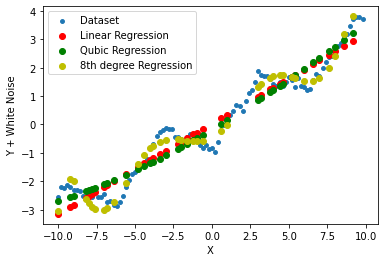

In [6]:
plt.figure()
plt.scatter(x,y_whitenoise,s=15,label=r'Dataset')
plt.scatter(x_test_WN,y_pred_test[0],color='r',label=r'Linear Regression')
plt.scatter(x_test_WN,y_pred_test[2],color='g',label=r'Qubic Regression')
plt.scatter(x_test_WN,y_pred_test[7],color='y',label=r'8th degree Regression')
plt.xlabel('X')
plt.ylabel('Y + White Noise')
plt.legend()
plt.show()

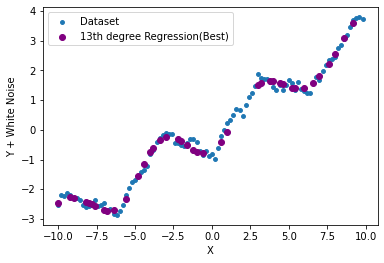

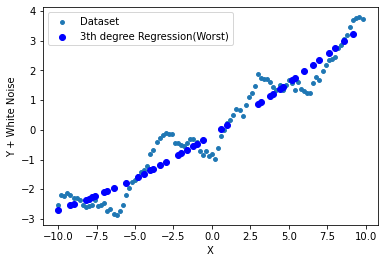

In [7]:
best_degree = mse_test_WN.index(min(mse_test_WN))
worst_degree = mse_test_WN.index(max(mse_test_WN))

plt.figure()
plt.scatter(x,y_whitenoise,s=15,label=r'Dataset')
plt.scatter(x_test_WN,y_pred_test[best_degree],color='purple',label=str(best_degree+1)+'th degree Regression(Best)')
plt.xlabel('X')
plt.ylabel('Y + White Noise')
plt.legend()
plt.show()

plt.figure()
plt.scatter(x,y_whitenoise,s=15,label=r'Dataset')
plt.scatter(x_test_WN,y_pred_test[worst_degree],color='b',label=str(worst_degree+1)+'th degree Regression(Worst)')
plt.xlabel('X')
plt.ylabel('Y + White Noise')
plt.legend()
plt.show()

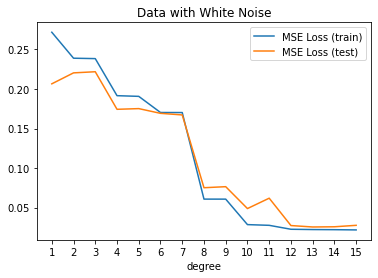

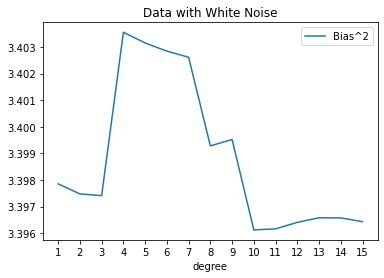

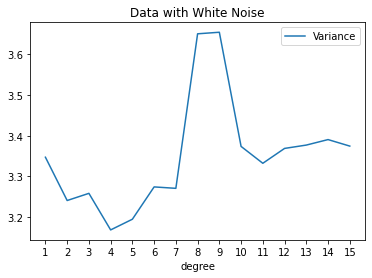

In [8]:
plt.figure()
plt.plot(range(1, 16), mse_train_WN, label='MSE Loss (train)')
plt.plot(range(1, 16), mse_test_WN, label='MSE Loss (test)')
plt.title('Data with White Noise')
plt.xticks(range(1, 16))
plt.xlabel('degree')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 16), bias_WN, label='Bias^2')
plt.title('Data with White Noise')
plt.xticks(range(1, 16))
plt.xlabel('degree')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 16), variance_WN, label='Variance')
plt.title('Data with White Noise')
plt.xticks(range(1, 16))
plt.xlabel('degree')
plt.legend()
plt.show()

## With Poisson Noise

In [9]:
y_poissonnoise=y+0.1*np.random.poisson(lam=2,size=100)

x_train_PN, x_test_PN, y_train_PN, y_test_PN = train_test_split(x,y_poissonnoise,test_size=0.4, random_state=1)

In [10]:
coeffs_PN = []
y_pred_train, y_pred_test = {},{}
for i in range(1, 16):
    coeffs_PN.append(np.polyfit(x_train_PN, y_train_PN, i))
    y_pred_train[i-1] = np.polyval(coeffs_PN[i-1],x_train_PN)
    y_pred_test[i-1] = np.polyval(coeffs_PN[i-1],x_test_PN)

In [11]:
mse_test_PN, mse_train_PN, bias_PN, variance_PN = [],[],[],[]
mse_train_PN = []
print('MSE\t\tPoisson Noise')
print('\t\ttrain\t\ttest')
for i in range(15):
    print(f'degree {i+1}:', end='\t')
    
    mse_train_i = MSE(y_pred_train[i], y_train_PN)
    mse_train_PN.append(mse_train_i)
    
    mse_test_i = MSE(y_pred_test[i], y_test_PN)
    mse_test_PN.append(mse_test_i)
    
    bias_PN.append(np.mean((y_test_PN - np.mean(y_pred_test[i])) ** 2))
    variance_PN.append(np.var(y_pred_test[i]))
    
    print('%.3f\t\t%.3f' % (mse_test_i, mse_train_i))

MSE		Poisson Noise
		train		test
degree 1:	0.339		0.183
degree 2:	0.342		0.152
degree 3:	0.376		0.142
degree 4:	0.306		0.121
degree 5:	0.327		0.114
degree 6:	0.318		0.110
degree 7:	0.322		0.103
degree 8:	0.131		0.055
degree 9:	0.133		0.051
degree 10:	0.065		0.033
degree 11:	0.070		0.032
degree 12:	0.057		0.030
degree 13:	0.058		0.030
degree 14:	0.055		0.030
degree 15:	0.052		0.030


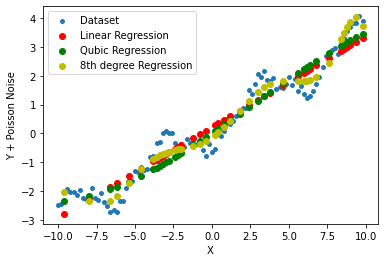

In [12]:
plt.figure()
plt.scatter(x,y_poissonnoise,s=15,label=r'Dataset')
plt.scatter(x_test_PN,y_pred_test[0],color='r',label=r'Linear Regression')
plt.scatter(x_test_PN,y_pred_test[2],color='g',label=r'Qubic Regression')
plt.scatter(x_test_PN,y_pred_test[7],color='y',label=r'8th degree Regression')
plt.xlabel('X')
plt.ylabel('Y + Poisson Noise')
plt.legend()
plt.show()

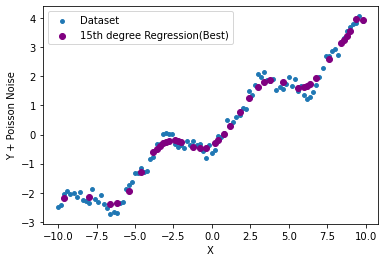

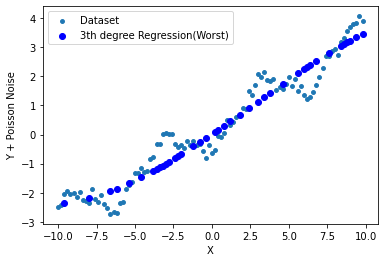

In [13]:
best_degree = mse_test_PN.index(min(mse_test_PN))
worst_degree = mse_test_PN.index(max(mse_test_PN))

plt.figure()
plt.scatter(x,y_poissonnoise,s=15,label=r'Dataset')
plt.scatter(x_test_PN,y_pred_test[best_degree],color='purple',label=str(best_degree+1)+'th degree Regression(Best)')
plt.xlabel('X')
plt.ylabel('Y + Poisson Noise')
plt.legend()
plt.show()

plt.figure()
plt.scatter(x,y_poissonnoise,s=15,label=r'Dataset')
plt.scatter(x_test_PN,y_pred_test[worst_degree],color='b',label=str(worst_degree+1)+'th degree Regression(Worst)')
plt.xlabel('X')
plt.ylabel('Y + Poisson Noise')
plt.legend()
plt.show()

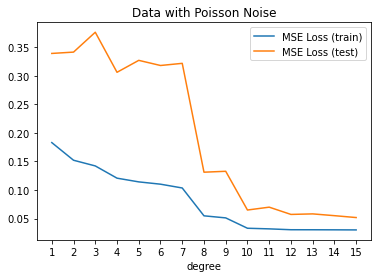

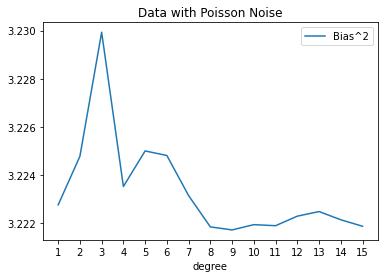

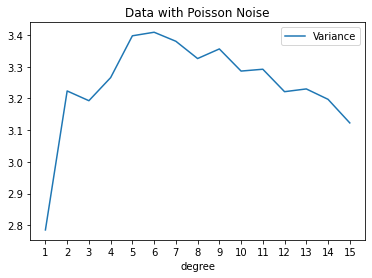

In [14]:
plt.figure()
plt.plot(range(1, 16), mse_train_PN, label='MSE Loss (train)')
plt.plot(range(1, 16), mse_test_PN, label='MSE Loss (test)')
plt.title('Data with Poisson Noise')
plt.xticks(range(1, 16))
plt.xlabel('degree')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 16), bias_PN, label='Bias^2')
plt.title('Data with Poisson Noise')
plt.xticks(range(1, 16))
plt.xlabel('degree')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, 16), variance_PN, label='Variance')
plt.title('Data with Poisson Noise')
plt.xticks(range(1, 16))
plt.xlabel('degree')
plt.legend()
plt.show()